In [ ]:
'''!wget https://drive.google.com/file/d/1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0/view?usp=sharing

!gdown --id 1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0

# Unzip the downloaded file
!unzip -q braintumor3.zip

# List the files to confirm extraction
!ls'''

--2025-04-08 17:00:41--  https://drive.google.com/file/d/1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.175.139, 142.251.175.101, 142.251.175.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.175.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  91.42K  --.-KB/s    in 0.04s   

2025-04-08 17:00:42 (2.16 MB/s) - ‘view?usp=sharing’ saved [93609]

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0
From (redirected): https://drive.google.com/uc?id=1l8lrpI1sk5wp4dN-6WKZ9g3BRcBIvax0&confirm=t&uuid=d95dbb5d-152a-4f33-933a-20a

##Importing Dataset


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("braintumor3"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'braintumor3'.
There are 2 directories and 0 images in 'braintumor3/test'.
There are 0 directories and 906 images in 'braintumor3/test/present'.
There are 0 directories and 405 images in 'braintumor3/test/absent'.
There are 2 directories and 0 images in 'braintumor3/train'.
There are 0 directories and 4117 images in 'braintumor3/train/present'.
There are 0 directories and 1595 images in 'braintumor3/train/absent'.


In [ ]:
# No. of images
num_tumor_present_train = len(os.listdir("braintumor3/train/present"))
num_tumor_present_train

4117

In [ ]:
# Class Names
import pathlib
import numpy as np
data_dir = pathlib.Path("braintumor3/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['absent' 'present']


##Visualisation


Image shape: (512, 512, 3)


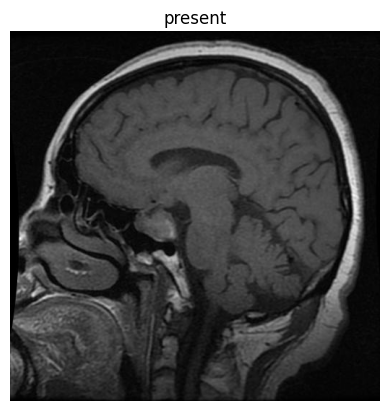

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

img = view_random_image(target_dir="braintumor3/train/",
                        target_class="present")

In [ ]:
# Normalisation/Scaling
img/255.

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0

##Model Building

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "braintumor3/train/"
test_dir = "braintumor3/test/"

# data into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"), # /same
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.8448 - loss: 0.3758 - val_accuracy: 0.9321 - val_loss: 0.1945
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.9570 - loss: 0.1300 - val_accuracy: 0.9481 - val_loss: 0.1573
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9758 - loss: 0.0759 - val_accuracy: 0.9512 - val_loss: 0.1526
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.9275 - val_loss: 0.1947
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9924 - val_loss: 0.0297


In [ ]:
# Summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

#Visualisation

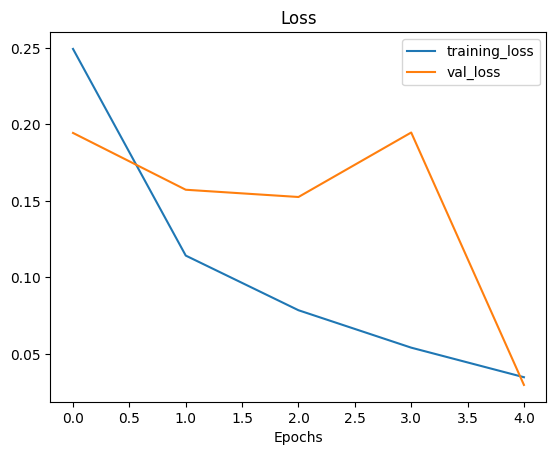

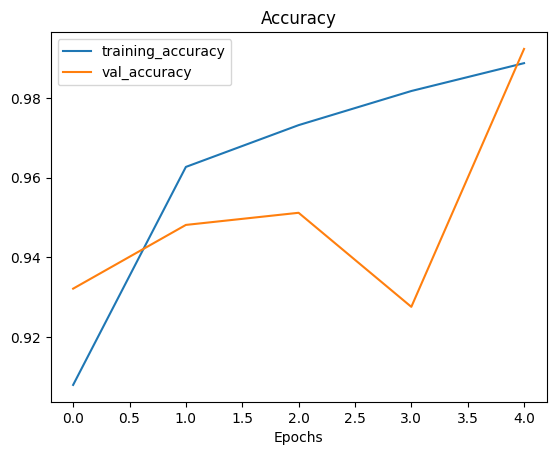

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss curves
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

plot_loss_curves(history_1)

Image shape: (512, 512)
Image shape: (294, 236, 3)


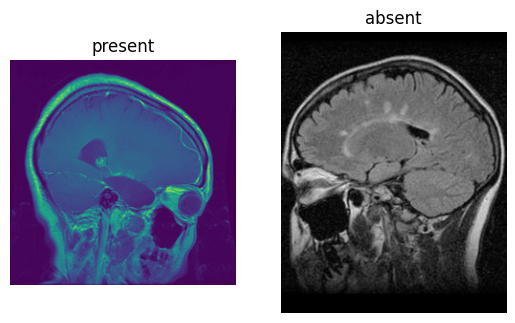

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
tumor_present = view_random_image("braintumor3/train/", "present")
plt.subplot(1, 2, 2)
tumor_absent = view_random_image("braintumor3/train/", "absent")

Modifying Model


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.6090 - loss: 0.9464 - val_accuracy: 0.6911 - val_loss: 0.6740
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.7253 - loss: 0.6631 - val_accuracy: 0.6911 - val_loss: 0.6525
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.7086 - loss: 0.6435 - val_accuracy: 0.6911 - val_loss: 0.6382
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.7237 - loss: 0.6220 - val_accuracy: 0.6911 - val_loss: 0.6289
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7193 - loss: 0.6126 - val_accuracy: 0.6911 - val_loss: 0.6233


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

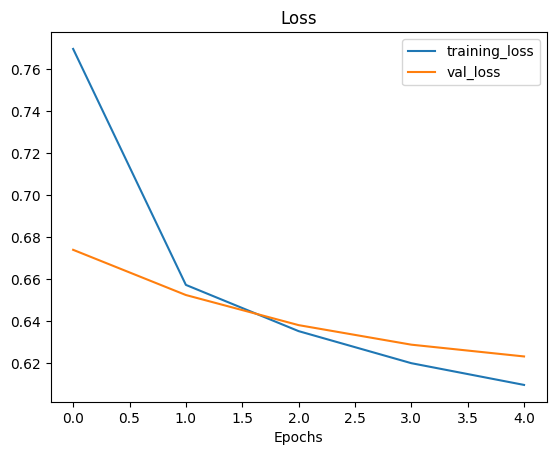

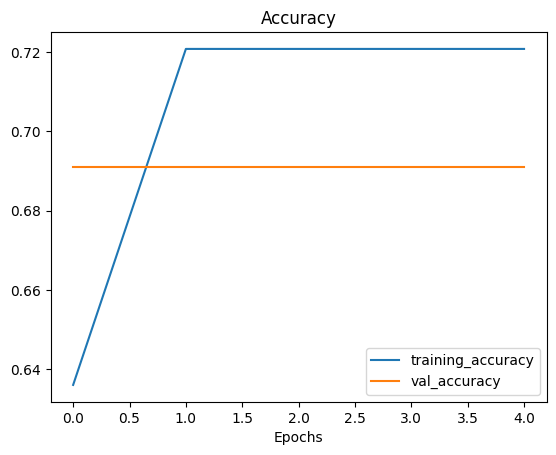

In [ ]:
plot_loss_curves(history_2)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.7206 - loss: 1.7307 - val_accuracy: 0.8101 - val_loss: 0.7039
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9029 - loss: 0.3302 - val_accuracy: 0.8757 - val_loss: 0.3809
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9309 - loss: 0.2126 - val_accuracy: 0.9169 - val_loss: 0.3321
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9457 - loss: 0.1765 - val_accuracy: 0.9443 - val_loss: 0.1846
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9675 - loss: 0.1052 - val_accuracy: 0.9375 - val_loss: 0.2574


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

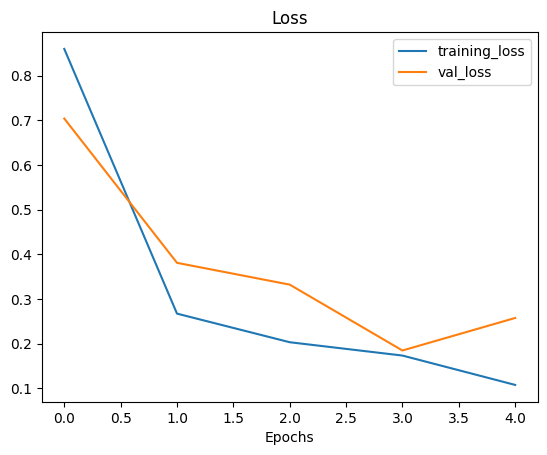

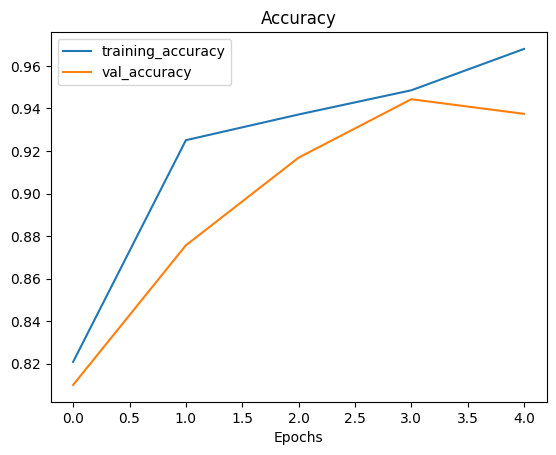

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.8091 - loss: 0.9063 - val_accuracy: 0.9703 - val_loss: 0.0986
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9980 - loss: 0.0118 - val_accuracy: 0.9931 - val_loss: 0.0348
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.9969 - val_loss: 0.0179
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 1.0000 - loss: 5.4693e-04 - val_accuracy: 0.9962 - val_loss: 0.0205


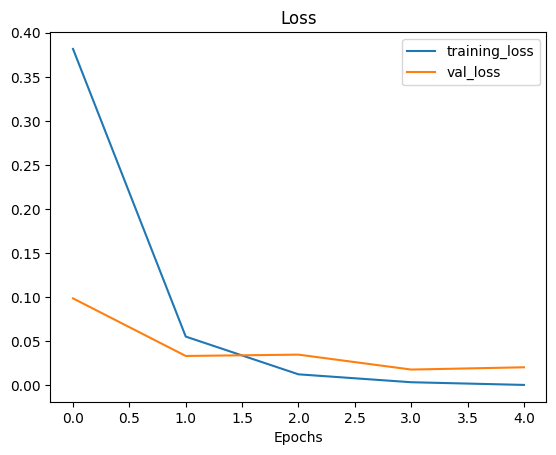

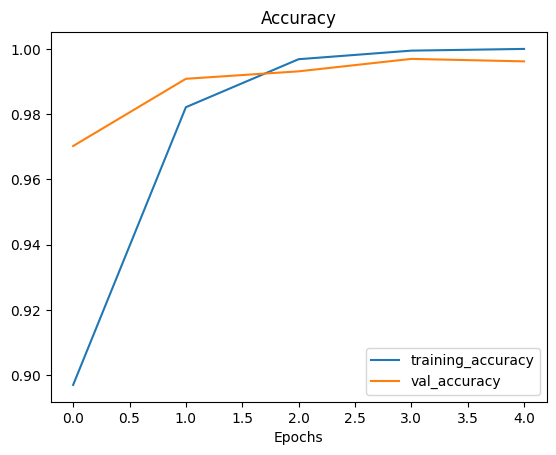

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = tf.keras.models.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8002 - loss: 0.4725 - val_accuracy: 0.9115 - val_loss: 0.2320
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9407 - loss: 0.1621 - val_accuracy: 0.9252 - val_loss: 0.2084
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9535 - loss: 0.1346 - val_accuracy: 0.9336 - val_loss: 0.1929
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9629 - loss: 0.1050 - val_accuracy: 0.9367 - val_loss: 0.1554
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9696 - loss: 0.0882 - val_accuracy: 0.9580 - val_loss: 0.1232


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

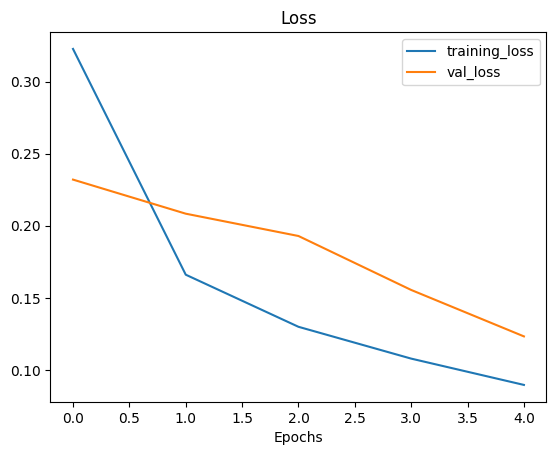

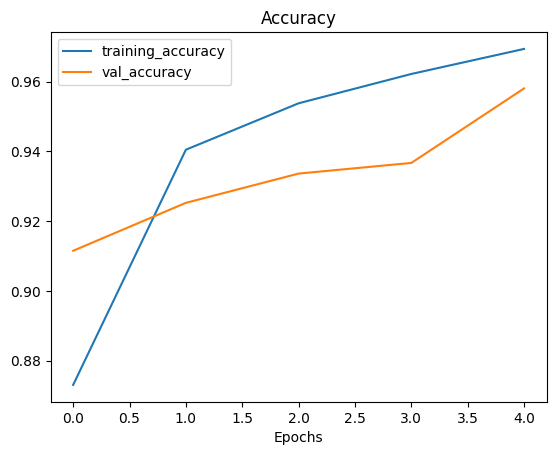

In [ ]:
plot_loss_curves(history_5)

##Reduce Overfitting

In [ ]:
# data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "braintumor3/train/"
test_dir = "braintumor3/test/"

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 5712 images belonging to 2 classes.
Non-augmented training images:
Found 5712 images belonging to 2 classes.
Unchanged test images:
Found 1311 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = next(train_data)
augmented_images,labels =next(train_data_augmented)

Before augmentationa vs after augmentaion

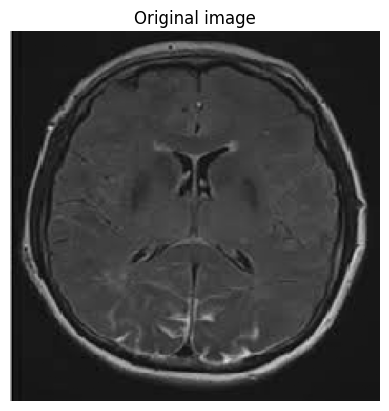

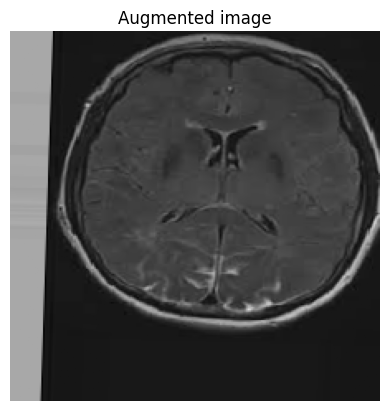

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Model with data augmentation

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 409ms/step - accuracy: 0.6913 - loss: 0.7363 - val_accuracy: 0.7620 - val_loss: 0.5354
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 429ms/step - accuracy: 0.7578 - loss: 0.5103 - val_accuracy: 0.4157 - val_loss: 1.3520
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 414ms/step - accuracy: 0.8580 - loss: 0.3715 - val_accuracy: 0.7437 - val_loss: 0.6025
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 405ms/step - accuracy: 0.8319 - loss: 0.4101 - val_accuracy: 0.8230 - val_loss: 0.4640
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 415ms/step - accuracy: 0.9040 - loss: 0.2653 - val_accuracy: 0.8886 - val_loss: 0.3384


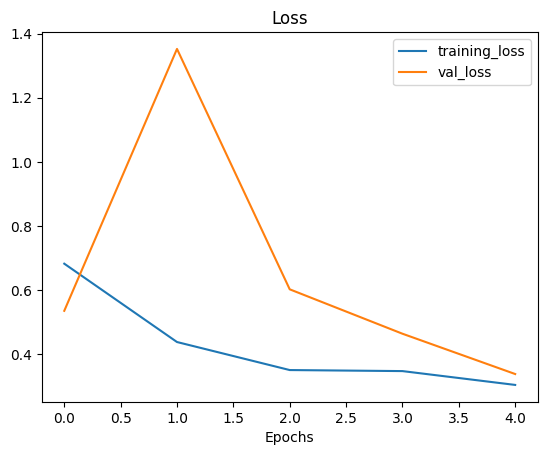

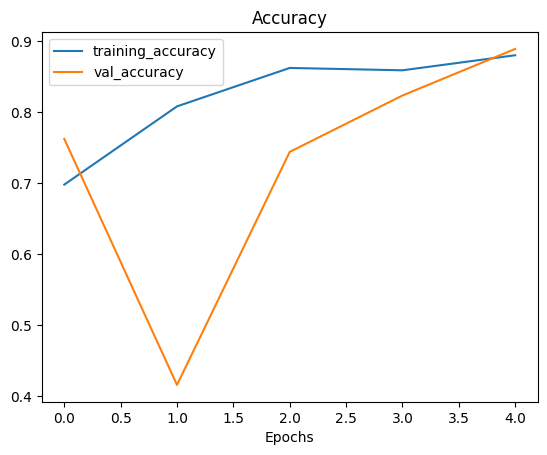

In [ ]:
plot_loss_curves(history_6)

Model with data augmentaion and shuffle= True

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 5712 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 420ms/step - accuracy: 0.7821 - loss: 0.5203 - val_accuracy: 0.7353 - val_loss: 0.6511
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.8982 - loss: 0.2747 - val_accuracy: 0.8963 - val_loss: 0.3286
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 432ms/step - accuracy: 0.9255 - loss: 0.2158 - val_accuracy: 0.8406 - val_loss: 0.5206
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 416ms/step - accuracy: 0.9192 - loss: 0.2216 - val_accuracy: 0.8711 - val_loss: 0.4810
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 422ms/step - accuracy: 0.9411 - loss: 0.1786 - val_accuracy: 0.8924 - val_loss: 0.4175


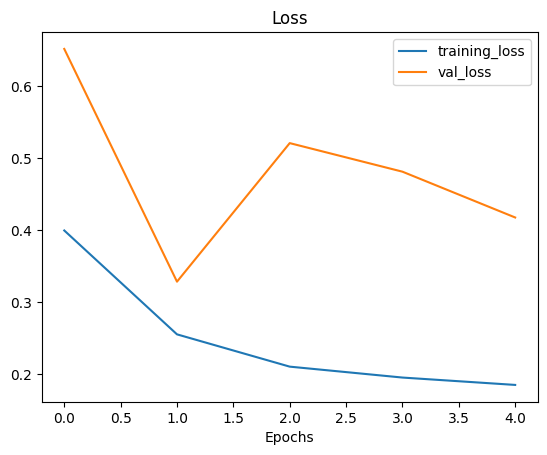

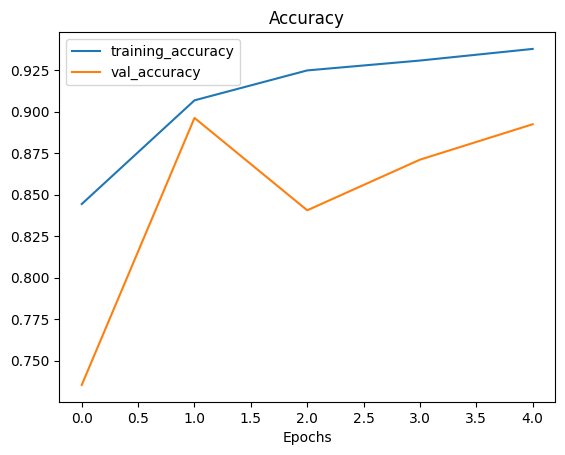

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 430ms/step - accuracy: 0.7767 - loss: 0.4553 - val_accuracy: 0.8177 - val_loss: 0.5530
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 436ms/step - accuracy: 0.9200 - loss: 0.2416 - val_accuracy: 0.8635 - val_loss: 0.5072
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 420ms/step - accuracy: 0.9385 - loss: 0.1929 - val_accuracy: 0.9191 - val_loss: 0.3065
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 431ms/step - accuracy: 0.9320 - loss: 0.2071 - val_accuracy: 0.8284 - val_loss: 0.5753
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 424ms/step - accuracy: 0.9323 - loss: 0.1935 - val_accuracy: 0.9191 - val_loss: 0.3737


In [ ]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

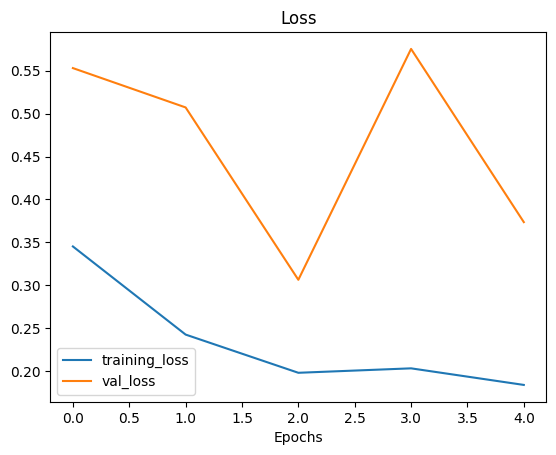

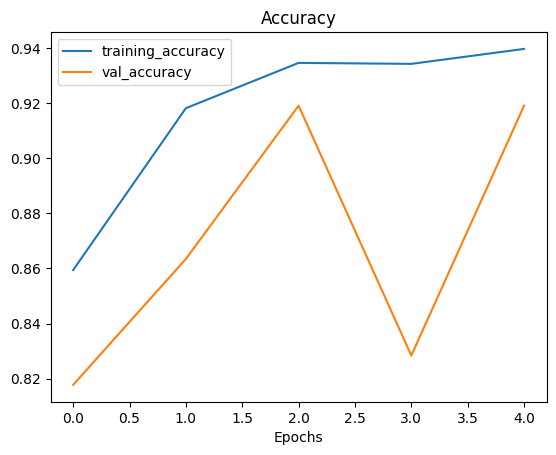

In [ ]:
plot_loss_curves(history_8)

##Importing image (User input)

In [ ]:
brain = mpimg.imread("/content/6 no.jpg")
plt.imshow(brain)
plt.axis(False);

In [ ]:
# import and resize
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

brain = load_and_prep_image("/content/6 no.jpg")

In [ ]:
pred = model_4.predict(brain)
pred

In [ ]:
print(class_names)

In [ ]:
def pred_and_plot(model, filename, class_names):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [224, 224])
  img = img/255.

  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_4, "/content/6 no.jpg", class_names)

In [ ]:
pred_and_plot(model_4, "/content/N1.JPG", class_names)

In [ ]:
pred_and_plot(model_4, "/content/Y185.jpg", class_names)

In [ ]:
pred_and_plot(model_4, "/content/Y33.jpg", class_names)

#Transfer Learning

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2025-04-08 18:01:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-08 18:01:34 (98.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="binary", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="binary")

Found 5712 files belonging to 2 classes.
Found 1311 files belonging to 2 classes.


In [ ]:
train_data.class_names

['absent', 'present']

In [ ]:
# See an example batch of data
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[3.0000000e+00 3.0000000e+00 3.0000000e+00]
   [3.0000000e+00 3.0000000e+00 3.0000000e+00]
   [3.0000000e+00 3.0000000e+00 3.0000000e+00]
   ...
   [1.0223236e+00 1.0223236e+00 1.0223236e+00]
   [1.3397217e-02 1.3397217e-02 1.3397217e-02]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[2.0736609e+00 2.0736609e+00 2.0736609e+00]
   [2.0736609e+00 2.0736609e+00 2.0736609e+00]
   [2.0736609e+00 2.0736609e+00 2.0736609e+00]
   ...
   [1.0223236e+00 1.0223236e+00 1.0223236e+00]
   [1.3397217e-02 1.3397217e-02 1.3397217e-02]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[2.0000000e+00 2.0000000e+00 2.0000000e+00]
   [2.0000000e+00 2.0000000e+00 2.0000000e+00]
   [2.0000000e+00 2.0000000e+00 2.0000000e+00]
   ...
   [1.0027406e+00 1.0027406e+00 1.0027406e+00]
   [1.3397217e-02 1.3397217e-02 1.3397217e-02]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  ...

  [[1.2411946e+00 1.2411946e+00 1.2411946e+00]
   [4.3548088e+00 4.3548088e+00 4.3548088e+00]
   [1.2261017e+

##First model

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_9 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_9.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_9.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250408-180635
Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.8068 - loss: 0.3880 - val_accuracy: 0.9625 - val_loss: 0.1384
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9591 - loss: 0.1260 - val_accuracy: 0.9563 - val_loss: 0.1330
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9725 - loss: 0.0937 - val_accuracy: 0.9500 - val_loss: 0.1071
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9747 - loss: 0.0793 - val_accuracy: 0.9531 - val_loss: 0.1100
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.9531 - val_loss: 0.1001


In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer_10
1 rescaling_2
2 normalization_2
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_co

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, None, None, 3)  │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, None, None, 3)  │              0 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization) 

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
model_9.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,923,157 (22.60 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 2,564 (10.02 KB)

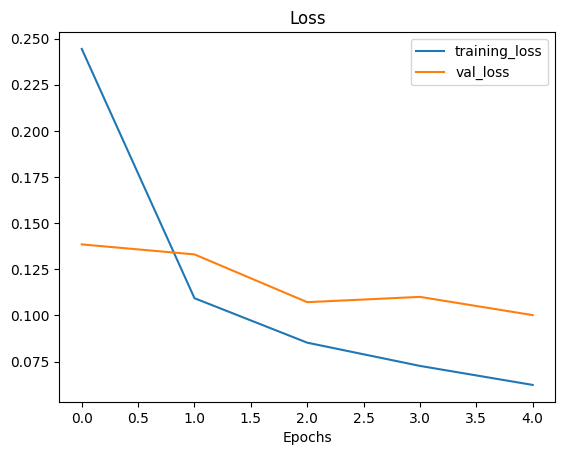

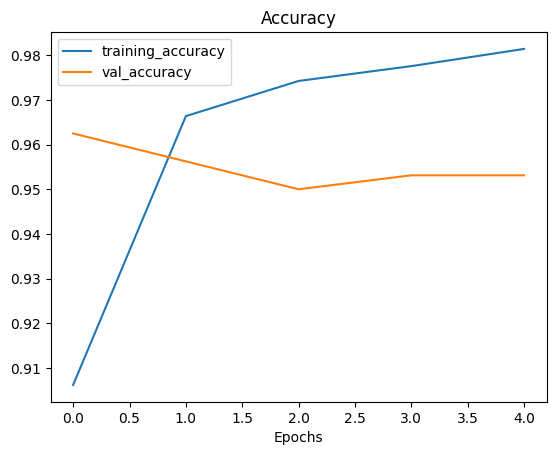

In [ ]:
plot_loss_curves(history_10_percent)

##Model Second


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  #preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")



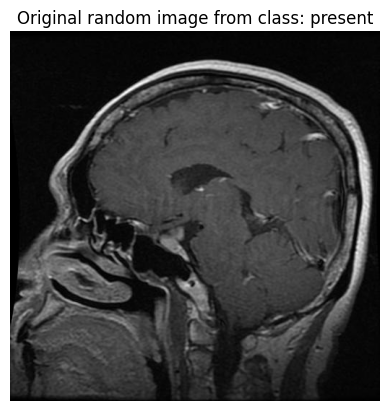

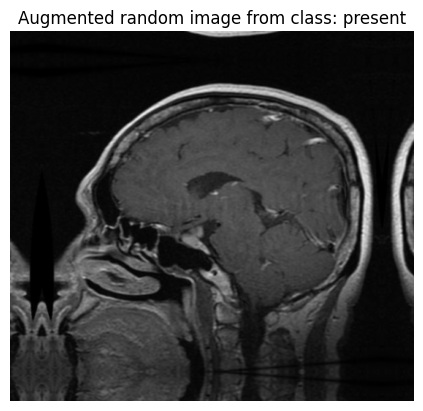

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "braintumor3/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 1,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="sigmoid", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model



In [ ]:
model_10 = create_base_model()

In [ ]:
# Setup checkpoint path
#checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary
checkpoint_path = "model_checkpoints_weights/checkpoint.weights.h5"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_10.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[checkpoint_callback])

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7985 - loss: 0.4188
Epoch 1: val_loss improved from inf to 0.18371, saving model to model_checkpoints_weights/checkpoint.weights.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 359ms/step - accuracy: 0.7990 - loss: 0.4182 - val_accuracy: 0.9469 - val_loss: 0.1837
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9446 - loss: 0.1835
Epoch 2: val_loss improved from 0.18371 to 0.13833, saving model to model_checkpoints_weights/checkpoint.weights.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 281ms/step - accuracy: 0.9447 - loss: 0.1834 - val_accuracy: 0.9688 - val_loss: 0.1383
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9510 - loss: 0.1476
Epoch 3: val_loss did not improve from 0.13833
179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 248ms/step - accuracy: 0.9510 - loss: 0.1475 - val_accuracy: 0.9469 - val_loss: 0.1516
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9537 - loss: 0.1324
Epoch 4: val_loss

In [ ]:
model_10.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

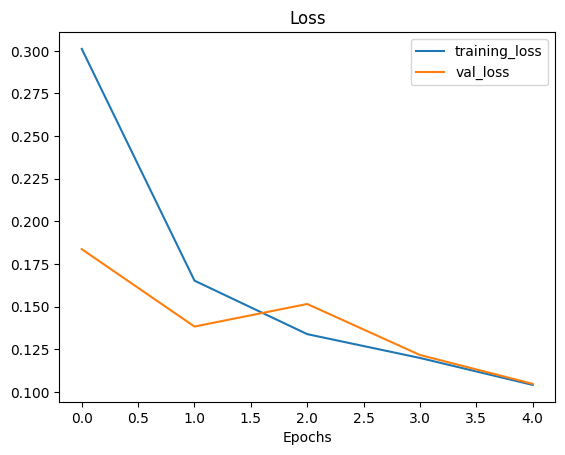

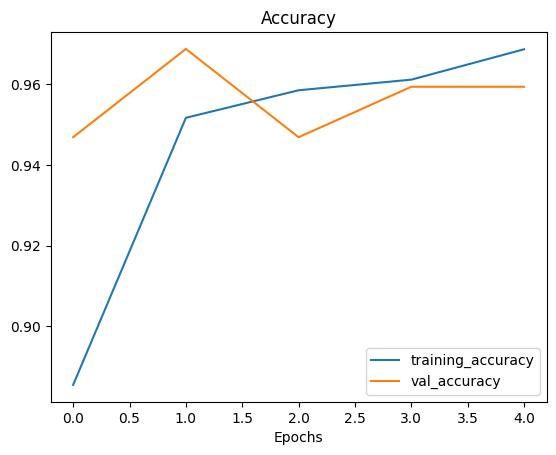

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
# Load in saved model weights and evaluate model
model_10.load_weights(checkpoint_path)
loaded_weights_model_results = model_10.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9650 - loss: 0.1104


##Model third

In [ ]:
for layer_number, layer in enumerate(model_10.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <InputLayer name=input_layer, built=True> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <Sequential name=data_augmentation, built=True> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <Functional name=efficientnetv2-b0, built=True> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <GlobalAveragePooling2D name=global_average_pooling_layer, built=True> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <Dense name=output_layer, built=True> | Trainable? True


In [ ]:
# Access the base_model layers of model_2
model_10_base_model = model_10.layers[2]
model_10_base_model.name

'efficientnetv2-b0'

In [ ]:
# How many layers are trainable in our model_2_base_model?
print(len(model_10_base_model.trainable_variables)) # layer at index 2 is the EfficientNetV2B0 layer (the base model)

0


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_10_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_13 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_d

In [ ]:
# Make all the layers in model_2_base_model trainable
model_10_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_10_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_10_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_13 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_d

In [ ]:
print(len(model_10.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_10.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)))


Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.9812 - loss: 0.0530 - val_accuracy: 0.9719 - val_loss: 0.0660
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 145ms/step - accuracy: 0.9826 - loss: 0.0507 - val_accuracy: 0.9781 - val_loss: 0.0632
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.9853 - loss: 0.0424 - val_accuracy: 0.9781 - val_loss: 0.0614
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.9836 - loss: 0.0430 - val_accuracy: 0.9844 - val_loss: 0.0511
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9719 - val_loss: 0.0727
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 62s 120ms/step - accuracy: 0.9863 - loss: 0.0432 - val_accuracy: 0.9875 - val_loss: 0.0467


In [ ]:
# Evaluate the model on the test data
results_fine_tune= model_10.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9794 - loss: 0.0596


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.8855041861534119, 0.9516806602478027, 0.9585084319114685, 0.9611344337463379, 0.968662440776825, 0.9821428656578064, 0.9837185144424438, 0.9849439859390259, 0.9838935732841492, 0.9859943985939026, 0.9859943985939026]


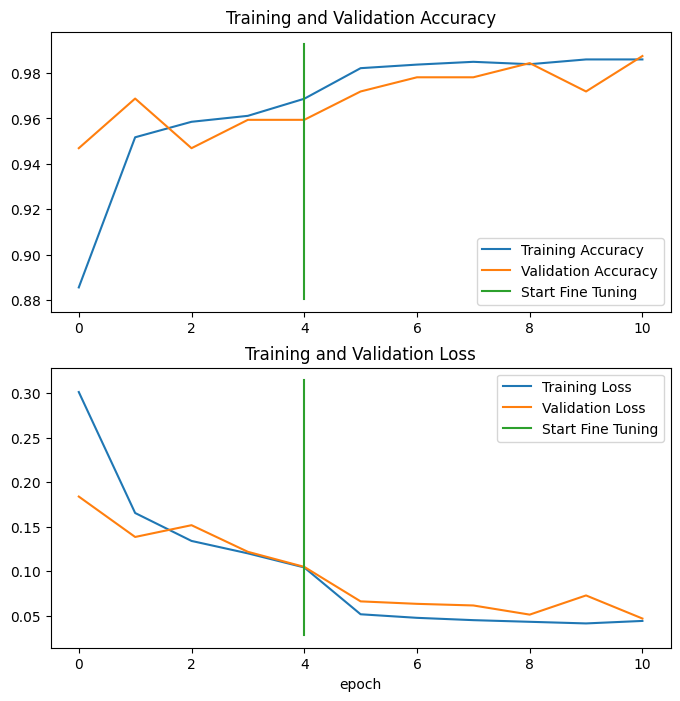

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)